In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
sims = 10000
bankruptcy = np.empty(sims)
finalAUM = np.empty(sims)
manager_profit = np.empty(sims)
for i in range(sims):
    AUM = 1000000
    chance = 18/38
    profit = 0
    win = 0
    #start the loop, which will be done yearly
    for a in range(0,30):
        #get 1% of the AUM from the AUM to the management (profits)
        profit = profit + (AUM * 0.01)
        AUM = AUM - (AUM * 0.01)
        #pay 10% of the money gambling
        gambling_money = AUM * 0.1
        #rum the gambling, win = 1, loss = 0
        win1 = np.random.binomial(1, chance, 1)
        if win1 == 1:
            AUM = AUM + gambling_money #add the money won to the pool
        else:
            AUM = AUM - gambling_money #substract the lost money
            win2 = 0
            while win2 == 0 and AUM != 0: #repeated until its won and we still have money to play
                if AUM > (gambling_money*2):
                    gambling_money = gambling_money * 2 #double the money being gambled
                    win2 = np.random.binomial(1, chance, 1)
                    if win2 == 1:
                        AUM = AUM + gambling_money #add the won money
                    else:
                        AUM = AUM - gambling_money #substract the lost money
                else:
                    gambling_money = AUM
                    win3 = np.random.binomial(1, chance, 1)
                    if win3 == 1:
                        AUM = AUM + gambling_money #add the won money
                    else: 
                        AUM = AUM - gambling_money #all money lost
                if AUM == 0:
                    break
            if AUM == 0:
                break
    manager_profit[i] = profit
    bankruptcy[i] = a+1 #equivalent: company survived a+1 years (min 1 year, max 30 year)
    finalAUM[i] = AUM

In [73]:
#Risk of bankruptcy of the hedge fund
np.sum(bankruptcy == 30)/len(bankruptcy)

0.0126

In [74]:
#Expected Profit / Loss of the client
np.mean(finalAUM) - 1000000

-859310.1098266963

In [75]:
#Expected Profit / Loss of management
np.mean(manager_profit)

132112.51519364983

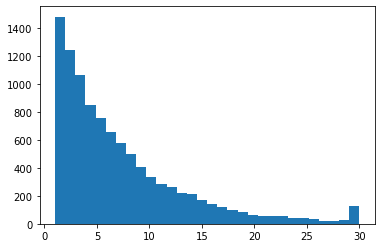

In [76]:
plt.hist(bankruptcy, bins = 30);

In [77]:
np.max(manager_profit)

1337902.1768199538